In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('scores_df.csv', index_col = 0)

# Collaboration and Competition Report

---


#### Learning algorithm 

The aim of this project is to solve the [Tennis](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#tennis) environment provided by Unity, where two agents control rackets and bounce a ball over a net. 

This is a multi-agent RL system (MARL) and there are several ways to solve it. The simplest way is to re-use the code from the Continuous Control exercise, a DDPG algorithm but training 2 agents that share the same knowledge (brain). The DDPG agent collects experience from both players which is shared in the Replay buffer.

The DDPG, is a model-free algorithm (Deep Deterministic Policy Gradient) that belongs to the Actor-critic method. In an Actor-critic method, an actor performs an action through policy evaluaction while a critic provided feedback on the action by using a value-based method (in our case, we used a DQN). One of the advantages os this model is that it can operate over continuous action spaces.

In order to benefit fom experience replay, we set up a replay buffer that stores experience tuples consisting of state-action-reward-next_state-done. Batches of experience tuples are sampled from the experience buffer to train the agent. And to improve exploration, we added a noise function that follos an [Ornstein-Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process).

#### Model parameters and plot of the results

Following this [blogpost](https://medium.com/@kinwo/learning-to-play-tennis-from-scratch-with-self-play-using-ddpg-ac7389eb980e) that explains solving the tennis environment as a continuous control problem with DDPG we implemented several of the recommended improvements such as gradient clipping, dropout, etc. 

* The actor network has the following architecture, an input layer corresponding to the state size, a fully connected layer with 512 units with batch normalization and a relu activation function, then a fully connected layer with 256 neurons and relu activation and finally, the output layer corresponding to the action size. 
* The critic network architecture is the following, an input layer corresponding to the state space size, then a fully connected layer of 512 units with batch normalization and relu activation, this layer is concatenated with units corresponding to the action space size, then another hidden layer fully connected with 256 units and relu activation and finally an output of one unit corresponding to the Q-value. A dropout is added before the output layer to avoid overfitting and learn more efficiently. 

The model hyperparameters are the following:

BUFFER_SIZE = int(1e5)    
BATCH_SIZE = 512          
GAMMA = 0.99              
TAU = 2e-1                
LR_ACTOR = 1e-4           
LR_CRITIC = 1e-3          
WEIGHT_DECAY = 0.0000     

The model takes approximately 300 episodes to solve the environment with a minimum reward of 0.5. Plot below shows the reward per number of episodes used in training. 


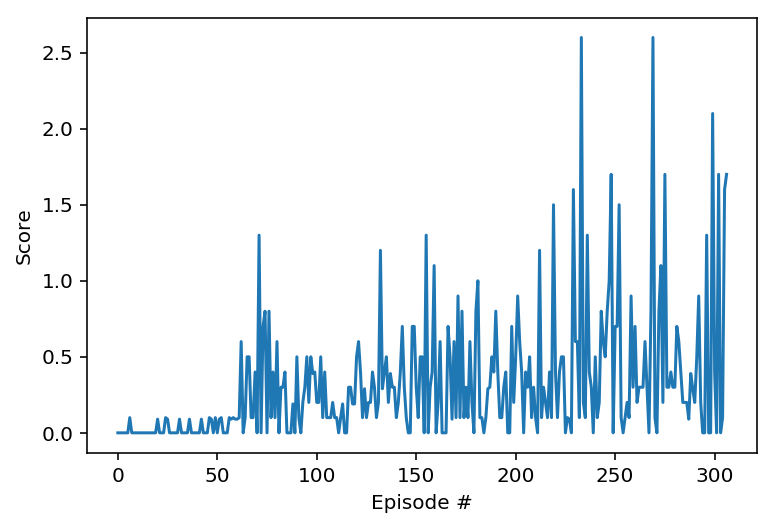

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


#### Future work
As an improvement, we could add Priority Experienced Replay, where important experiences will be sampled more often. 

### References:
* [Solving Continuous Control environment using Deep Deterministic Policy Gradient (DDPG) agent](https://medium.com/@kinwo/solving-continuous-control-environment-using-deep-deterministic-policy-gradient-ddpg-agent-5e94f82f366d)
* [Udacity repo:](https://github.com/udacity/deep-reinforcement-learning)
* [Continuous control with deep reinforcement learning](https://arxiv.org/abs/1509.02971)